# Trabajo final módulo 1

### Top 250 fichajes entre el año 2000 y 2018

Primero hacemos los import y pasamos el csv a dataframe

In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('../data/data.csv')
df.shape


(4700, 10)

In [2]:
df.describe()

,Age,Market_value,Transfer_fee
count,4700.000000,3.440000e+03,4.700000e+03
mean,24.338723,8.622469e+06,9.447586e+06
std,3.230809,8.795181e+06,1.043772e+07
min,0.000000,5.000000e+04,8.250000e+05
25%,22.000000,3.500000e+06,4.000000e+06
50%,24.000000,6.000000e+06,6.500000e+06
75%,27.000000,1.000000e+07,1.082000e+07
max,35.000000,1.200000e+08,2.220000e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  3440 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


Primero, voy a cambiar los nombres de las columnas

In [4]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')
df.head()

,name,position,age,team_from,league_from,team_to,league_to,season,market_value,transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


Como la columna 'season' resulta más difícil de ordenar, pasará a llamarse 'year' y se tomará como referencia el primer año de los dos que aparecen

In [5]:
df.rename(columns={'season':'year'}, inplace=True)
df['year']=df['year'].str[:4].astype(int)

In [6]:
df['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

También voy a reescalar la columna **transfer_fee** pasando los números a millones

In [7]:
#cuidado con usar esto más de una vez, porque puede cambiar los datos
df['transfer_fee']=df['transfer_fee']/1e6 
df['transfer_fee'].head()

0    60.00
1    56.81
2    40.00
3    36.15
4    34.50
Name: transfer_fee, dtype: float64

Compruebo si hay valores faltantes

In [8]:
df.isna().sum()

name               0
position           0
age                0
team_from          0
league_from        0
team_to            0
league_to          0
year               0
market_value    1260
transfer_fee       0
dtype: int64

Ahora sabemos que faltan valores en la columna **market_value**. Para comprobar cual es la mejor manera de lidiar con ellos, haré una columna (**transfer_diff**) con la diferencia entre el valor de mercado y la cuantía pagada.

In [9]:
df['transfer_diff']=df['market_value']-df['transfer_fee']
df.tail()

,name,position,age,team_from,league_from,team_to,league_to,year,market_value,transfer_fee,transfer_diff
4695,Jasmin Kurtic,Attacking Midfield,29,Atalanta,Serie A,SPAL,Serie A,2018,5000000.0,4.8,4999995.2
4696,Tchê Tchê,Central Midfield,25,Palmeiras,Série A,Dynamo Kyiv,Premier Liga,2018,3000000.0,4.8,2999995.2
4697,Silvan Widmer,Right-Back,25,Udinese Calcio,Serie A,FC Basel,Super League,2018,8500000.0,4.5,8499995.5
4698,Yuya Osako,Second Striker,28,1. FC Köln,2.Bundesliga,Werder Bremen,1.Bundesliga,2018,4500000.0,4.5,4499995.5
4699,Kyle Bartley,Centre-Back,27,Swansea,Championship,West Brom,Championship,2018,3500000.0,4.5,3499995.5


Vamos a ver qué sucede si hago la media de la columna **transfer_diff** obviando los valores NaN

In [10]:
df['transfer_diff'].dropna().mean()

8622458.823784884

Hay una diferencia negativa de dos millones de euros, vamos a comparar esta media con la media de **transfer_fee**

In [11]:
df['transfer_fee'].mean()

9.447586170212766

Como la media de **transfer_fee** es de 9.4 millones, no tendría sentido sustituir los valores NaN por estos, pues **transfer_diff** tiene un valor muy alto en relación

En general, es posible comprobar que la mayoría de fichajes que carecen de **market_value** son fichajes más antiguos, cuando este no se tenía en cuenta.

In [12]:
df[df['year']<2007]['market_value'].isna().sum()


1221

1221 de 1260 son debidos al año del fichaje, por lo que estos no se rellenarán y estos años no se tomarán en cuenta para métricas relacionadas con **market_value**. Comprobamos que podemos hacer con los otros 39

In [13]:
df[(df['year']>=2007) & (df['market_value'].isna())].count()

name             39
position         39
age              39
team_from        39
league_from      39
team_to          39
league_to        39
year             39
market_value      0
transfer_fee     39
transfer_diff     0
dtype: int64

En general, no son transferencias de valor muy alto, por lo que usar su propio valor de transferencia no parece sesgar mucho los datos, veamos si es así.

In [14]:
mask = df['year'] >= 2007
df.loc[mask, 'market_value'] = df.loc[mask, 'market_value'].fillna(df.loc[mask, 'transfer_fee'])
df['transfer_diff'] = df['market_value'] - df['transfer_fee']
df['transfer_diff'].dropna().mean()

8525800.044213854

La media de **transfer_diff** apenas ha variado, por lo que, gracias al poco peso de esta pequeña muestra, podemos hacer este cambio

Por último, comprobamos si hay filas repetidas

In [15]:
df[df.duplicated(subset=['name', 'transfer_fee', 'team_from'], keep=False)]


,name,position,age,team_from,league_from,team_to,league_to,year,market_value,transfer_fee,transfer_diff
1493,Ricardo Oliveira,Centre-Forward,26,Real Betis,LaLiga,AC Milan,Serie A,2006,6000000.0,15.0,5999985.0
2257,Ricardo Oliveira,Centre-Forward,29,Real Betis,LaLiga2,Al-Jazira,United Arab Emirates,2009,10000000.0,15.0,9999985.0
3124,Marko Devic,Centre-Forward,28,Metalist,Premier Liga,Shakhtar D.,Premier Liga,2012,7000000.0,5.0,6999995.0
3403,Marko Devic,Centre-Forward,30,Metalist,Premier Liga,Rubin Kazan,Premier Liga,2013,8000000.0,5.0,7999995.0


Aunque aparezcan varias, estas no se repiten, pues son transferencias diferentes

Ahora, ya con los datos preparados, podemos comenzar a comprender la información que nos aporta el dataset, no sin antes una nueva columna. Esta se utilizará para conocer la posición en el campo del jugador (portero, defensa, centrocampista o delantero)

In [16]:
position_map={'GK':'Goalkeeper',
               'DF':['Defender', 'Left-Back', 'Right-Back', 'Centre-Back', 'Sweeper'],
               'MF':['Midfielder', 'Defensive Midfield', 'Attacking Midfield', 'Central Midfield', 'Left Midfield', 'Right Midfield'],
               'FW':['Forward', 'Centre-Forward', 'Second Striker', 'Left Winger', 'Right Winger']}
df['general_position']=df['position'].map(lambda x: [k for k,v in position_map.items() if x in v][0] if x not in position_map.keys() else x)
df['general_position'].unique()
df['league_from'].value_counts()

league_from
Premier League    608
Serie A           602
Ligue 1           428
LaLiga            418
1.Bundesliga      265
                 ... 
 Slovakia           1
 Australia          1
Superettan          1
 Ecuador            1
Botola Pro          1
Name: count, Length: 118, dtype: int64

In [17]:
df.head()

,name,position,age,team_from,league_from,team_to,league_to,year,market_value,transfer_fee,transfer_diff,general_position
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000,NaN,60.00,NaN,FW
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000,NaN,56.81,NaN,FW
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000,NaN,40.00,NaN,FW
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000,NaN,36.15,NaN,FW
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000,NaN,34.50,NaN,FW


Lo primero que se visualizará es un histograma para comprobar cuáles son los valores de transacción más típicos en este dataset. Para evitar problemas con el rango producidos por unas pocas transferencias de muchos millones, se hará un grupo que engloba todas las de +80 millones

In [18]:
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

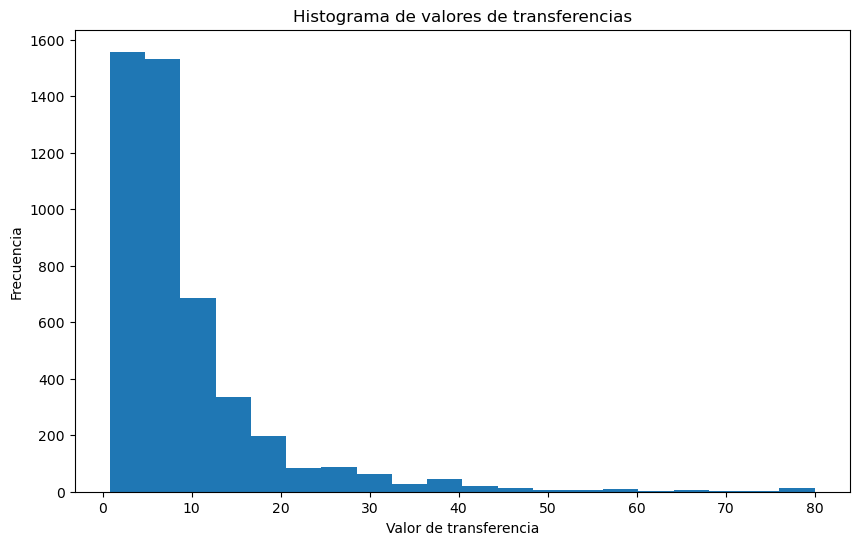

In [19]:
df['value_capped'] = df['transfer_fee'].clip(upper=80)
plt.figure(figsize=(10, 6))
plt.hist(df['value_capped'], bins=20)  
plt.xlabel('Valor de transferencia')
plt.ylabel('Frecuencia')
plt.title('Histograma de valores de transferencias')
plt.show()

Como era de esperar, la mayor parte de las transferencias están entre los 0 y los 10 millones

También podemos crear un gráfico de barras para ver qué cantidad promedio se paga por posición: delanteros, mediocampistas, defensas o porteros

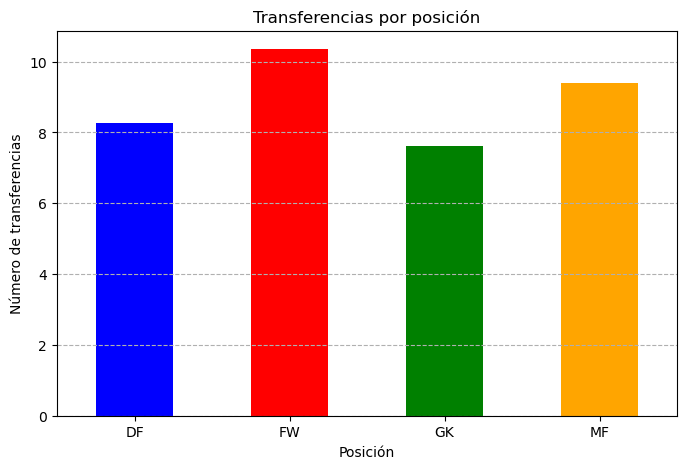

In [20]:
plt.figure(figsize=(8,5))
df.groupby('general_position')['transfer_fee'].mean().plot(kind='bar', color=['blue', 'red', 'green', 'orange'])

plt.xlabel('Posición')
plt.ylabel('Número de transferencias')
plt.title('Transferencias por posición')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=0)
plt.show()

Se puede apreciar cómo a más ofensiva es la posición, más se paga por la transferencia del jugador en promedio

Ahora vamos a visualizar cómo ocurre la inflación en el mundo del fútbol. Es decir, vamos a representar los valores de transferencia promedio por año en función del año 

<Figure size 800x500 with 0 Axes>

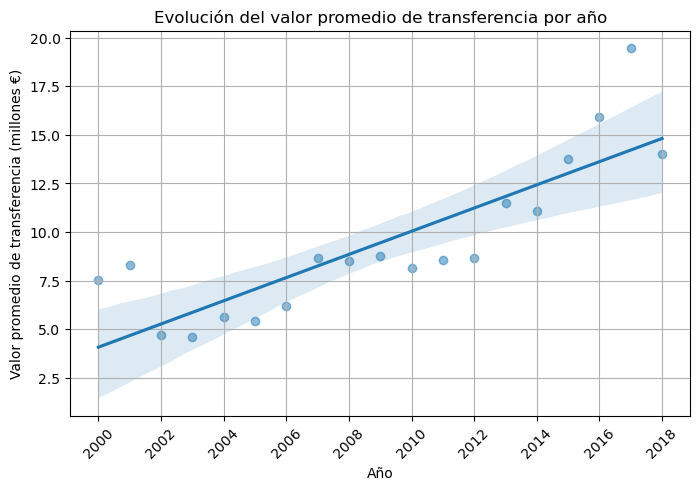

In [21]:
avg_by_year = df.groupby('year')['transfer_fee'].mean().reset_index()
plt.figure(figsize=(8,5))
plt.figure(figsize=(8,5))
sns.regplot(data=avg_by_year, x='year', y='transfer_fee', scatter_kws={'alpha':0.5})

plt.xlabel('Año')
plt.ylabel('Valor promedio de transferencia (millones €)')
plt.title('Evolución del valor promedio de transferencia por año')
plt.xticks(avg_by_year['year'][::2], rotation=45)
plt.grid(True)
plt.show()

La tendencia general, principalmente a partir de 2012, es de crecimiento del valor de las transferencias

A continuación, veremos cuales son las ligas que más han gastado en transferencias 

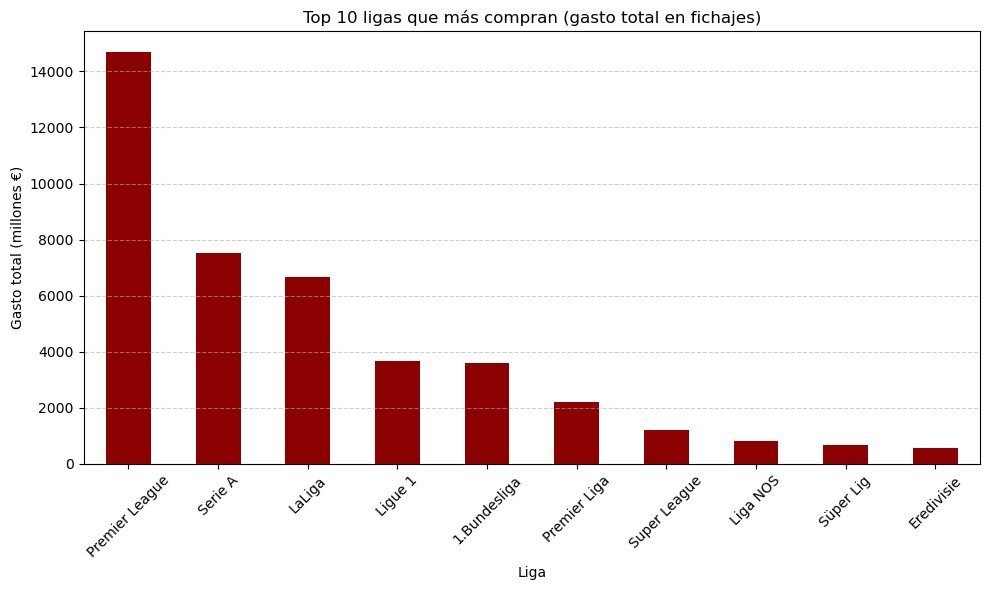

In [22]:
top10_spending=df.groupby('league_to')['transfer_fee'].sum().nlargest(10)
plt.figure(figsize=(10,6))
top10_spending.plot(kind='bar', color='#8B0000')

plt.title('Top 10 ligas que más compran (gasto total en fichajes)')
plt.ylabel('Gasto total (millones €)')
plt.xlabel('Liga')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

También resulta interesante comprobar qué clubes han obtenido una mayor rentabilidad (diferencia entre ventas y compras)

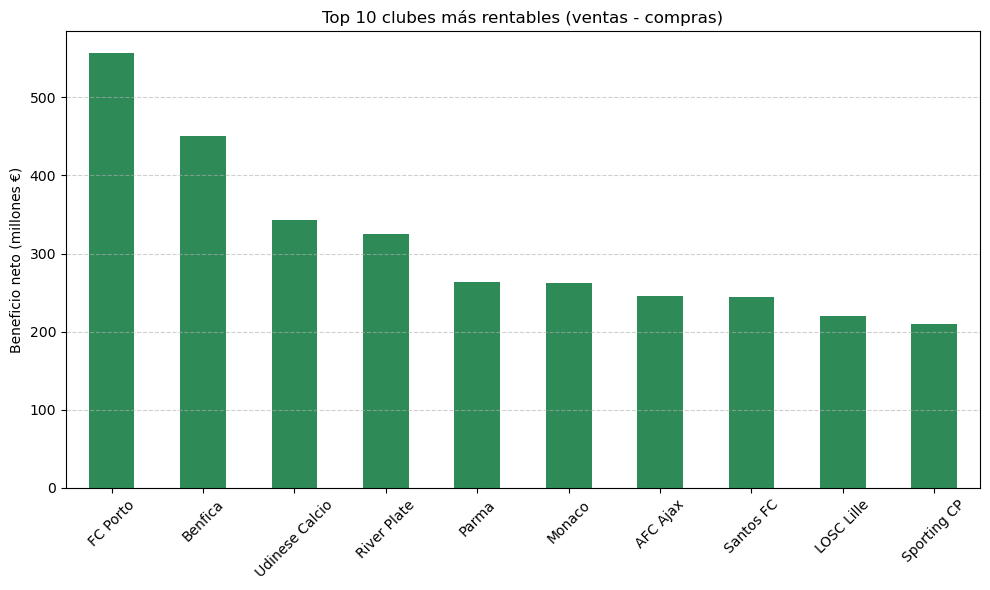

In [23]:
sales = df.groupby('team_from')['transfer_fee'].sum()  
purchases = df.groupby('team_to')['transfer_fee'].sum()
balance = pd.DataFrame({
    'ventas': sales,
    'compras': purchases
}).fillna(0)

balance['rentabilidad'] = balance['ventas'] - balance['compras']
top10_profit = balance['rentabilidad'].nlargest(10)
plt.figure(figsize=(10,6))
top10_profit.plot(kind='bar', color='seagreen')

plt.title('Top 10 clubes más rentables (ventas - compras)')
plt.ylabel('Beneficio neto (millones €)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Por último, comprobaremos la relación entre la edad de un jugador y su valor de mercado

<Figure size 800x500 with 0 Axes>

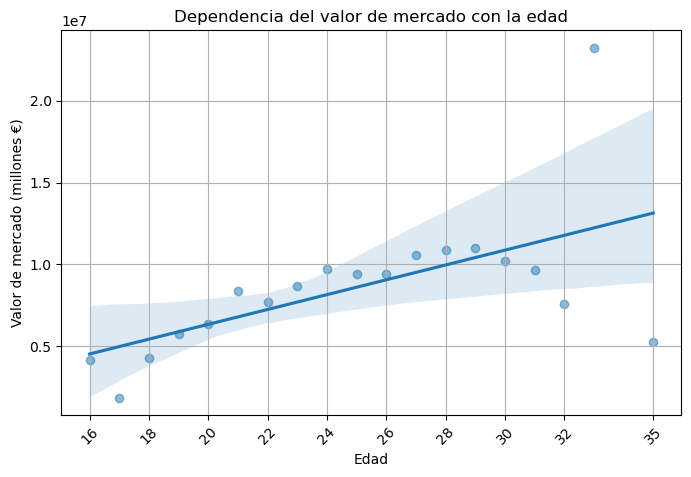

In [24]:
df_2007=df[df['year']>=2007].groupby('age')['market_value'].mean().reset_index()
plt.figure(figsize=(8,5))
plt.figure(figsize=(8,5))
sns.regplot(data=df_2007, x='age', y='market_value', scatter_kws={'alpha':0.5})

plt.xlabel('Edad')
plt.ylabel('Valor de mercado (millones €)')
plt.title('Dependencia del valor de mercado con la edad')
plt.xticks(df_2007['age'][::2], rotation=45)
plt.grid(True)
plt.show()

El valor de mercado crece con la edad hasta lo que suele ser el pico de rendimiento de un jugador, disminuyendo después con la edad

Con estas visualizaciones, se resume bastante bien la información que aporta el dataset. La tendencia al alza de los precios, los pagos inflados por jugadores de corte ofensivo, el mayor poder económico de las 5 grandes ligas y la necesidad de venta de los equipos de ligas como la portuguesa o la argentina.